# Neural Network for Image Processing using TensorFlow

## Andrew Galloway

Project Description: Develop a convolutional neural network to identify the nature of a magazine page. 
We want to classify pages in one of the following categories: Cover, Contents, Editorial, Spread, Ad, or Other.

Pip is the reccommended package manager for TensorFlow (TF) installation. For several reasons, we isolated our TF environment. In this case, we use a virutal machine (VM) configured exclusively for TF. Our VM operating system is Windows 10 1803.

Configuration Steps:
1. Clean OS Install
2. Download Python 3.6.7 x64
3. Execute Python installer
 - Add to PATH
 - Custom Installation    
 - Enable all options (requires Admin credentials)    
4. Confirm installation and configuration via PowerShell or terminal of choice.
 - python --version    
5. Download and Install Visual Studio 2017
 - Install Microsoft Visual C++ 2017 Redistributable workload. (Under compilers, build tools, and runtimes)    
6. Install Virtualenv (pip install virtualenv)
7. Confirm packages (pip list or virtualenv --version)
8. Virtual environment details
 - Initialize virtual environment (virtualenv ./Name) in our case, virtualenv ./MagNeuralNet    
 - Activate virtual environment (.\MagNeuralNet\scripts\activate)
 - Execution of scripts is disabled by default. Enable via admin PowerShell with (set-executionPolicy remoteSigned)       
 - Exit virtual environment (deactivate)    
9. Install packages in virtualenv (pip install tensorflow). Confirm packages (pip list)
 - TensorFlow    
 - Matplotlib    
 - Pillow    
 - Sklearn

## Data Collection

Data comes from RANGE magazine, an outfit in Carson City, Nevada. Our dataset is the pages from over 100 back issues dating back to 1991. Some pages were born digital, while others are scans of physical copies. Issues are around 88 pages each, so we have a population around 8800 pages.

## Cleaning and Exploratory Data Analysis

Data is organized in folders by back issue. For example, Fall 2017 is it's own folder (FA17) that contains 88 photos, page 1-88.

Existing intuition of RANGE magazines is used to explore the data. Further exploration takes place by confirming continuous values in folders (i.e. 1-88 without skipping a page).

Additional exploration takes place during manual assembly of the training set. Pages of a specific type are visually inspected and copied into labeled training folders. 

Visual data exploration indicates potential challenges in various forms. For example, the layout of contents, editorial, and all other pages have varied significantly over the years. Further, some pages could fall into multiple categories. For example, a page may contain part of an article (Other Category) and an Ad (Ad category). 

Visually we are able to see a well organized nested file structure of photos that coorespond to a magazine page. The goal is to develop an algorithm to classify the type of page. Our labels are - Cover, Contents, Up Front (aka Editorial), Spread, Ad, or Other.

Data Exploration - Cover


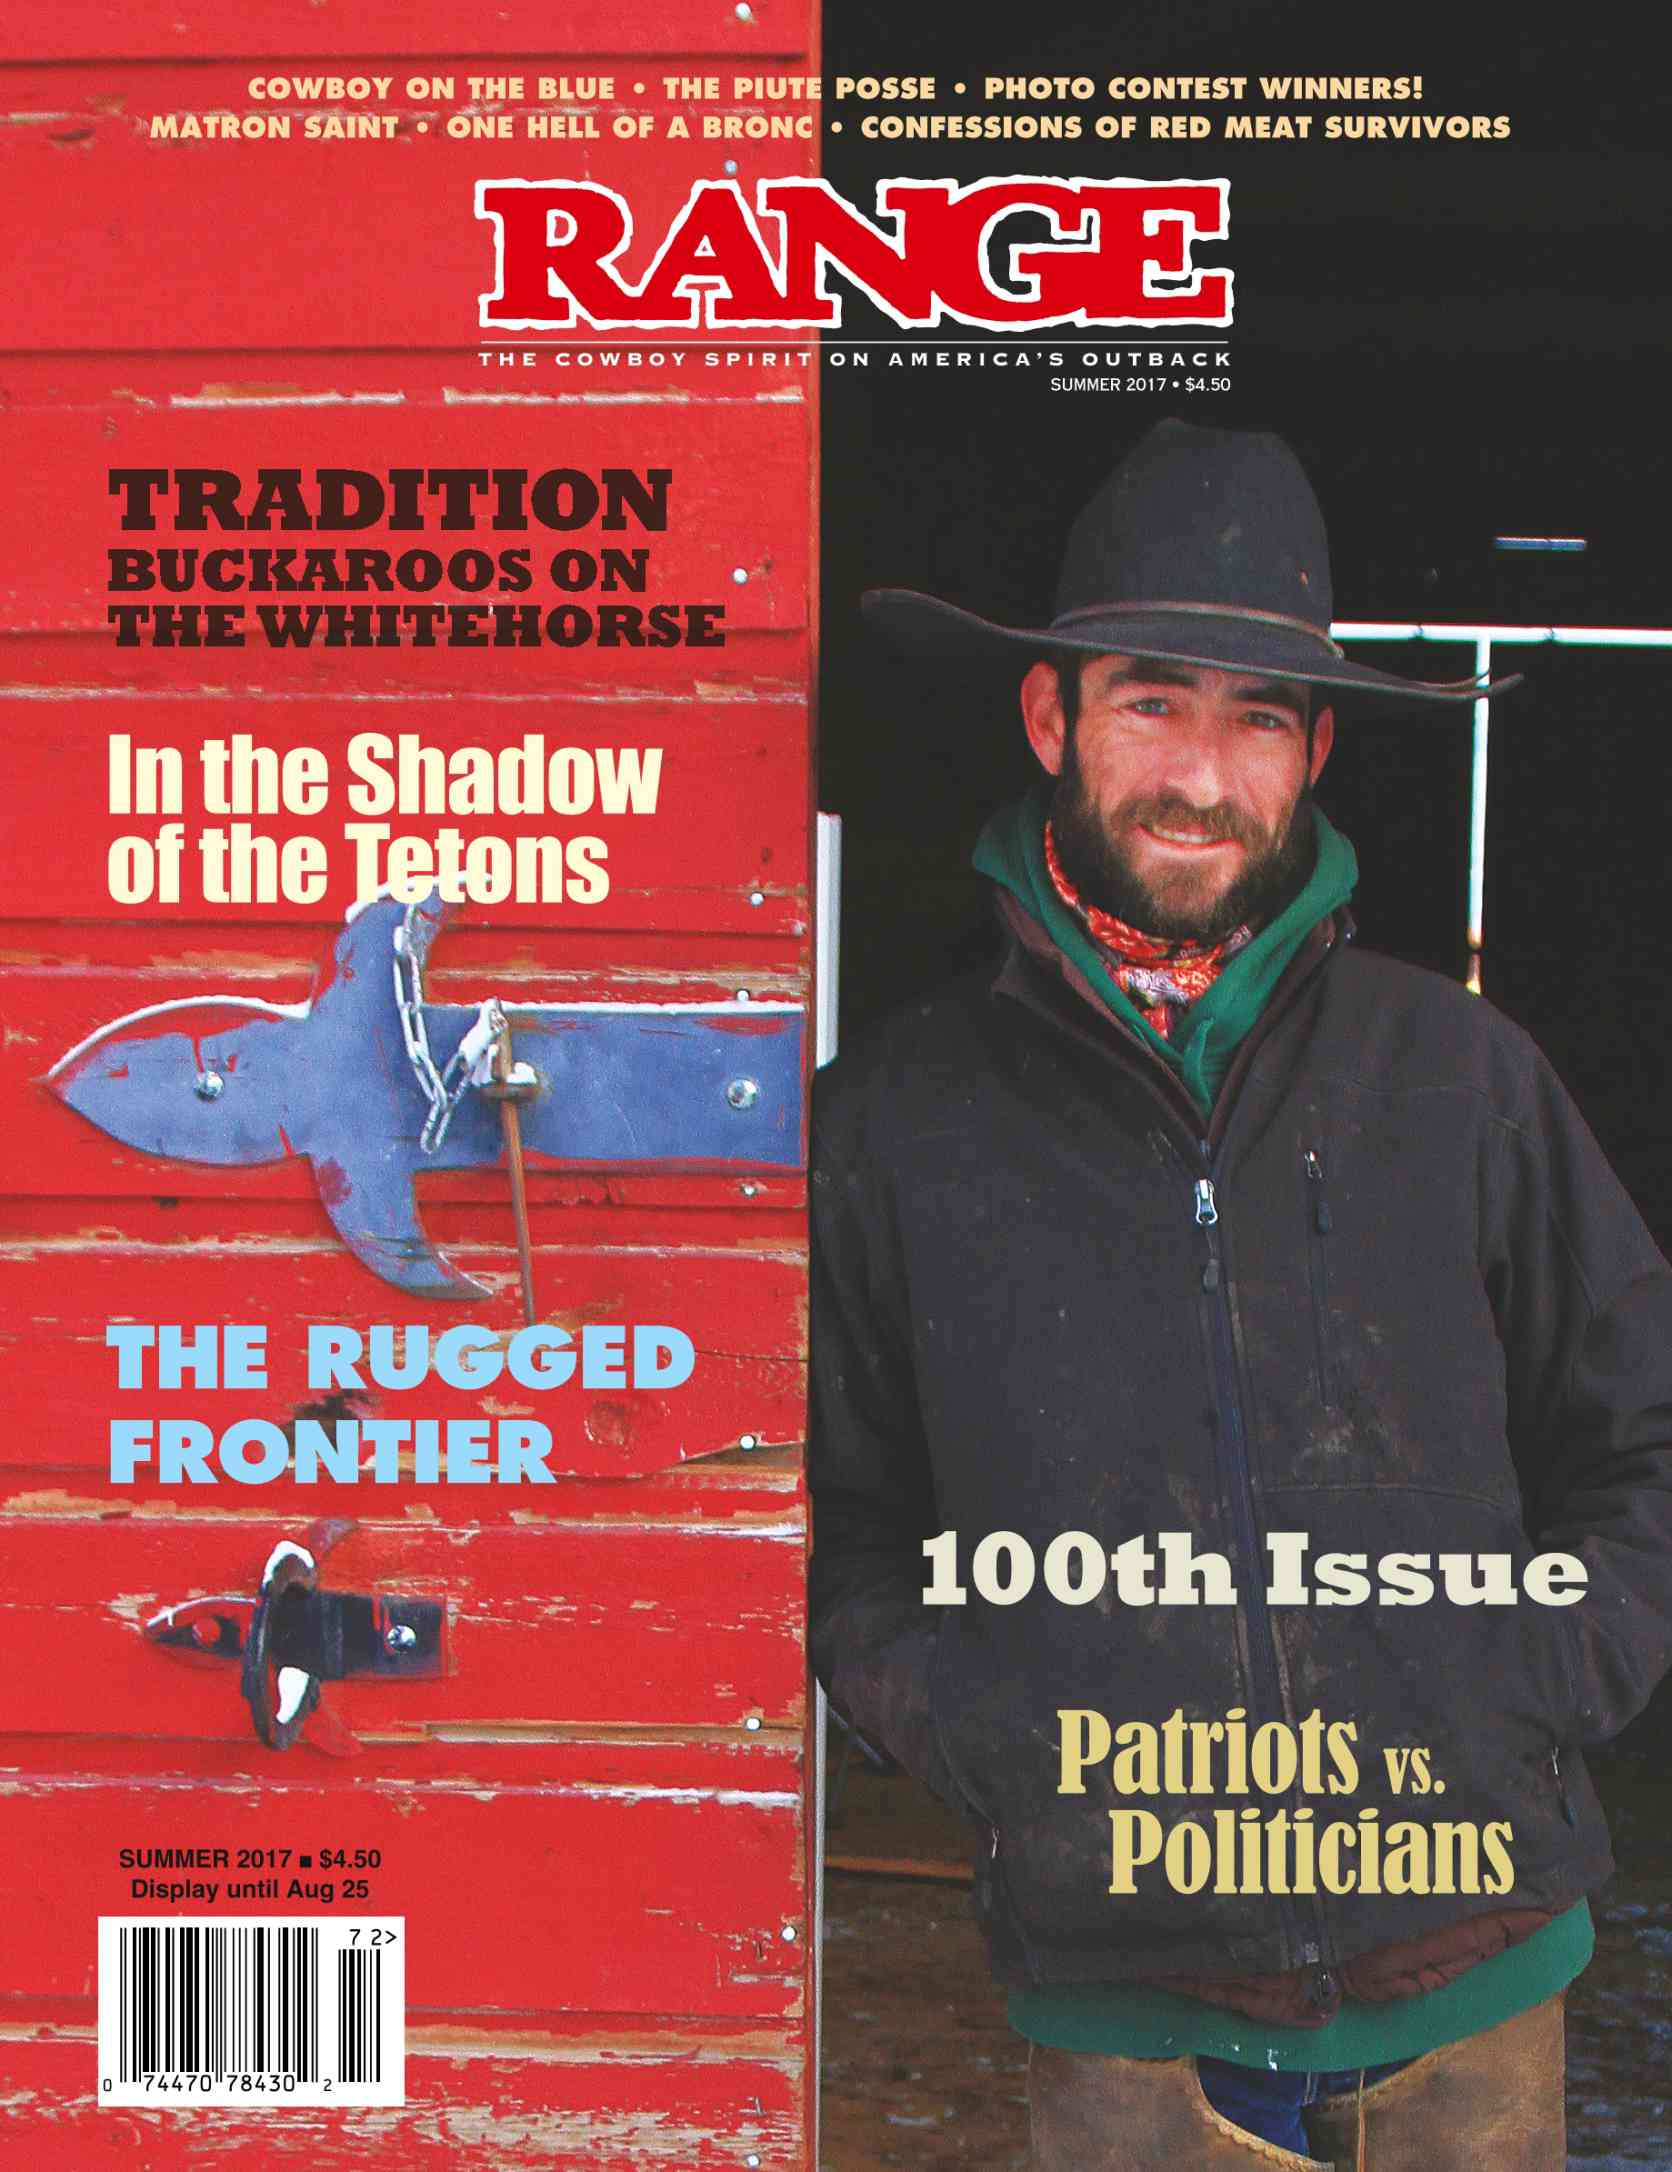

In [29]:
from IPython.display import Image
print('Data Exploration - Cover')
Image('trainData/example/SU17-1.jpg',height=440, width=340)

Data Exploration - Contents


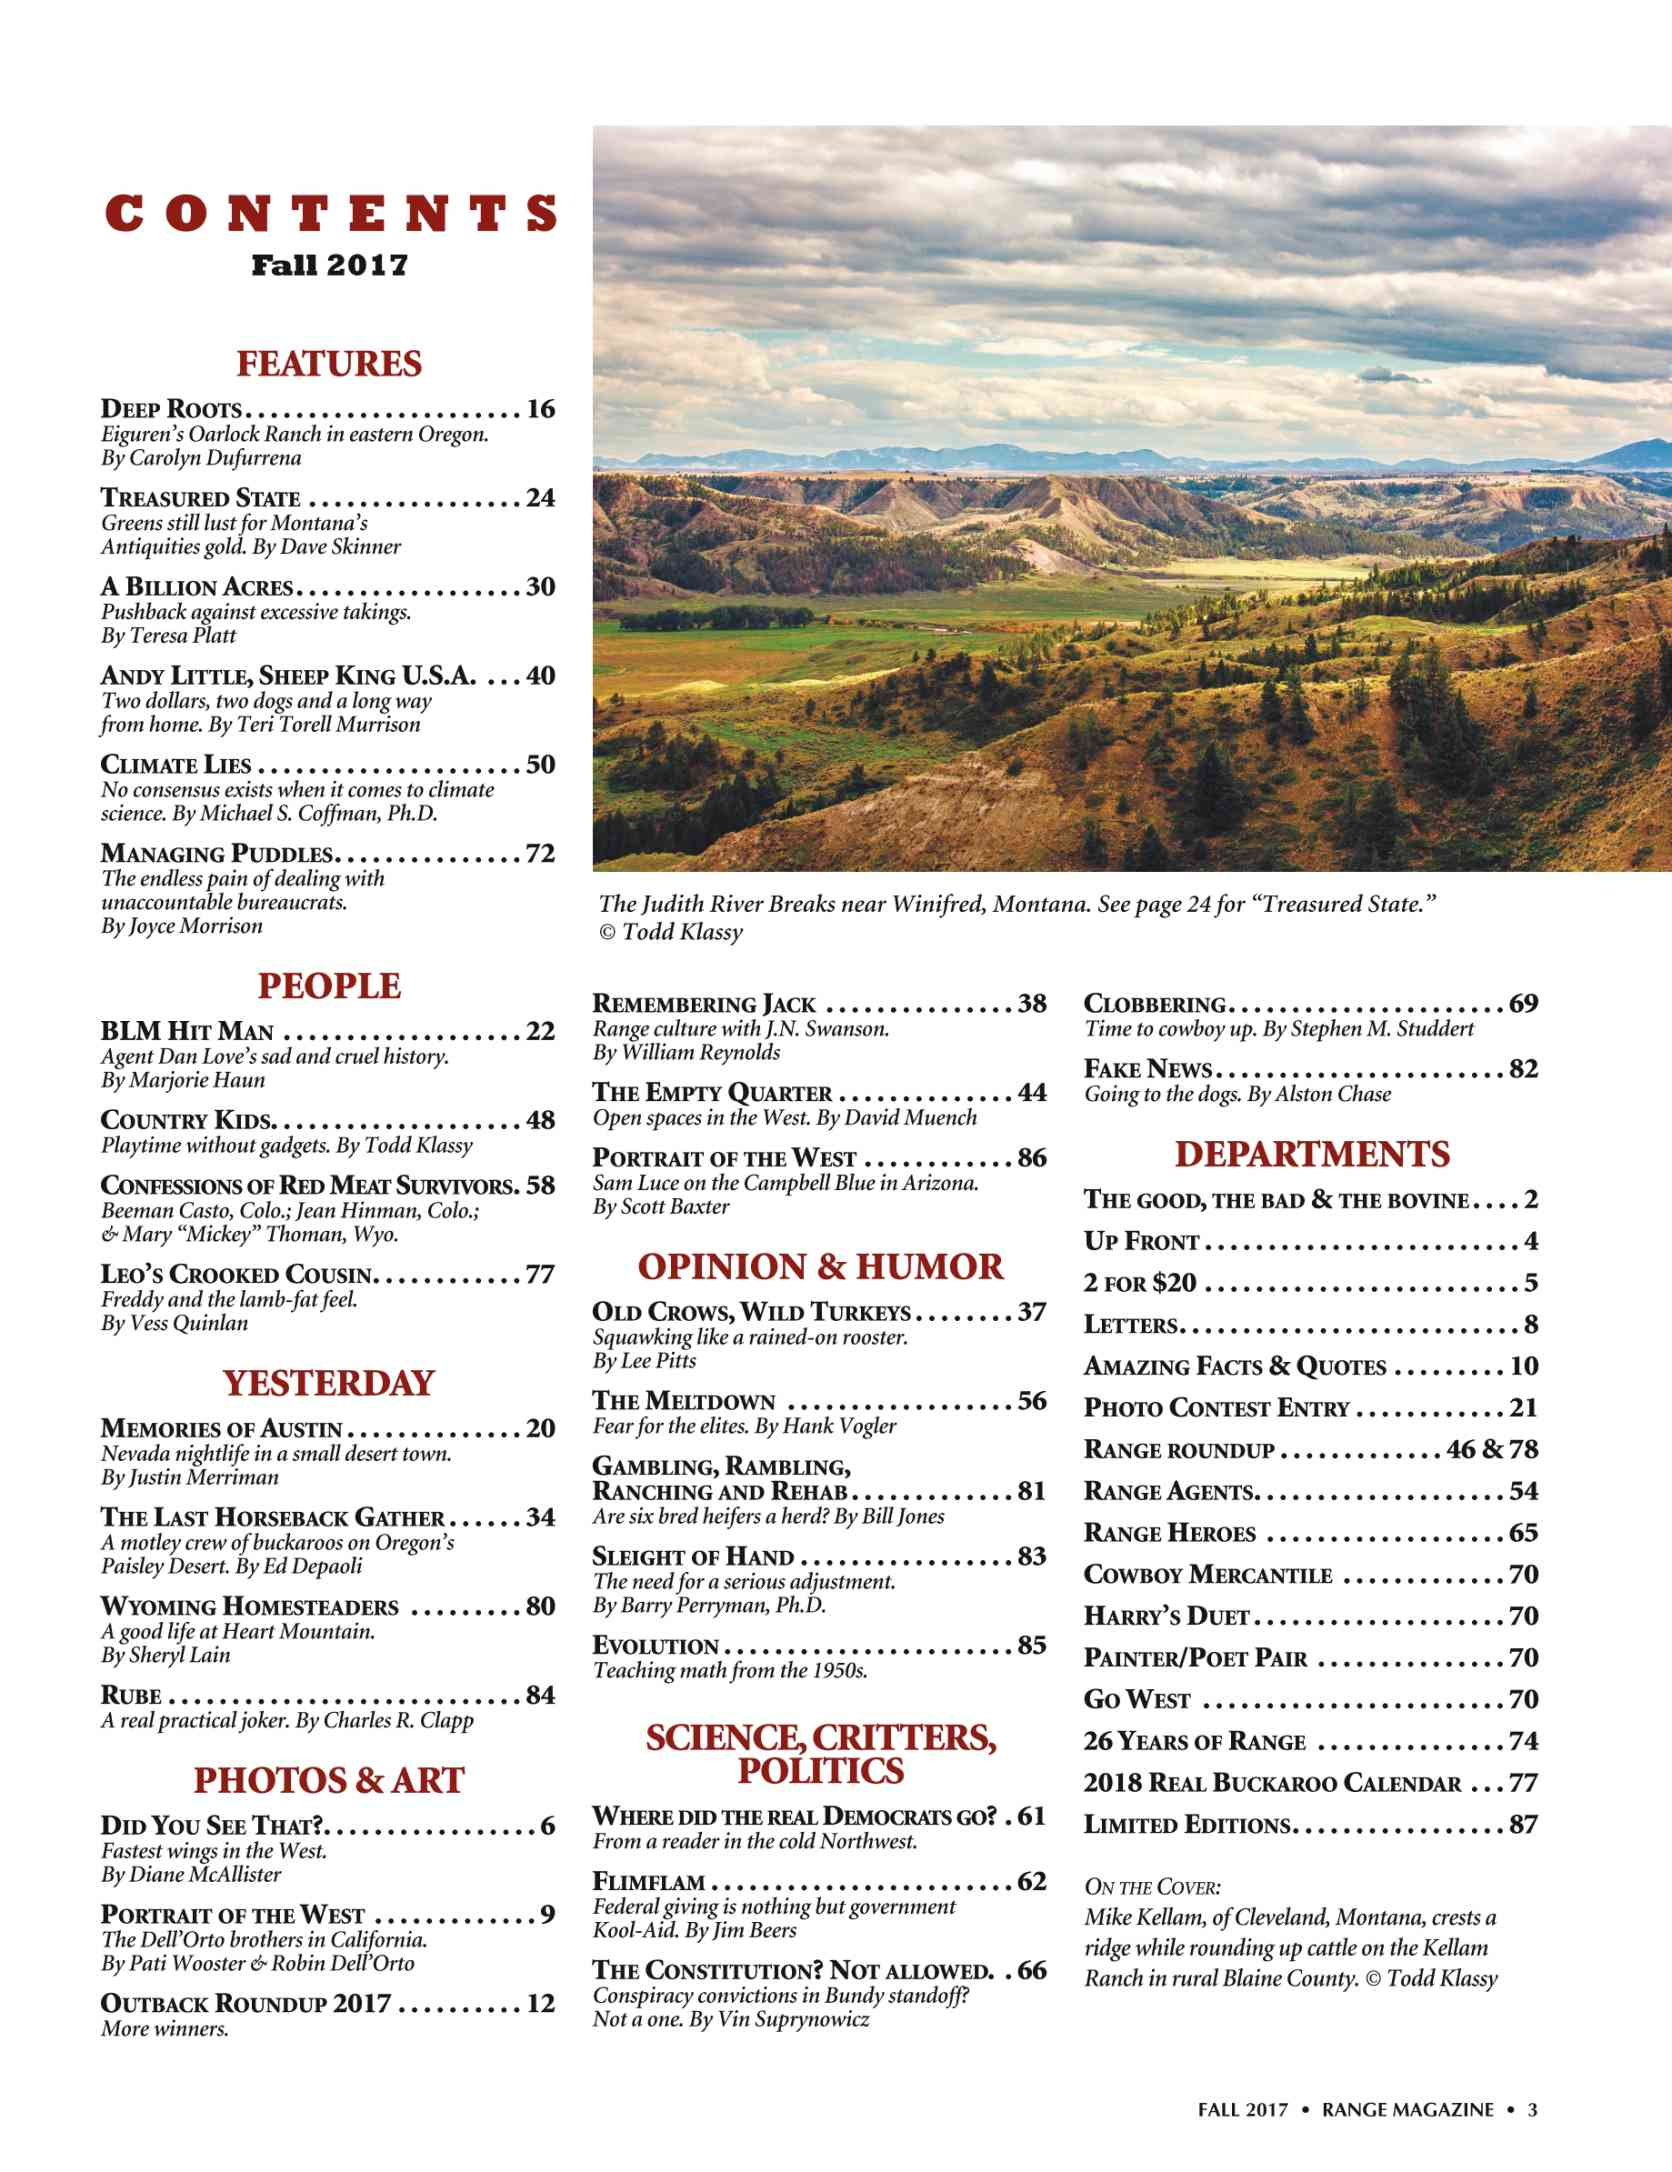

In [36]:
print('Data Exploration - Contents')
Image('trainData/example/FA17-3.jpg',height=440, width=340)

Data Exploration - Up Front (Editorial)


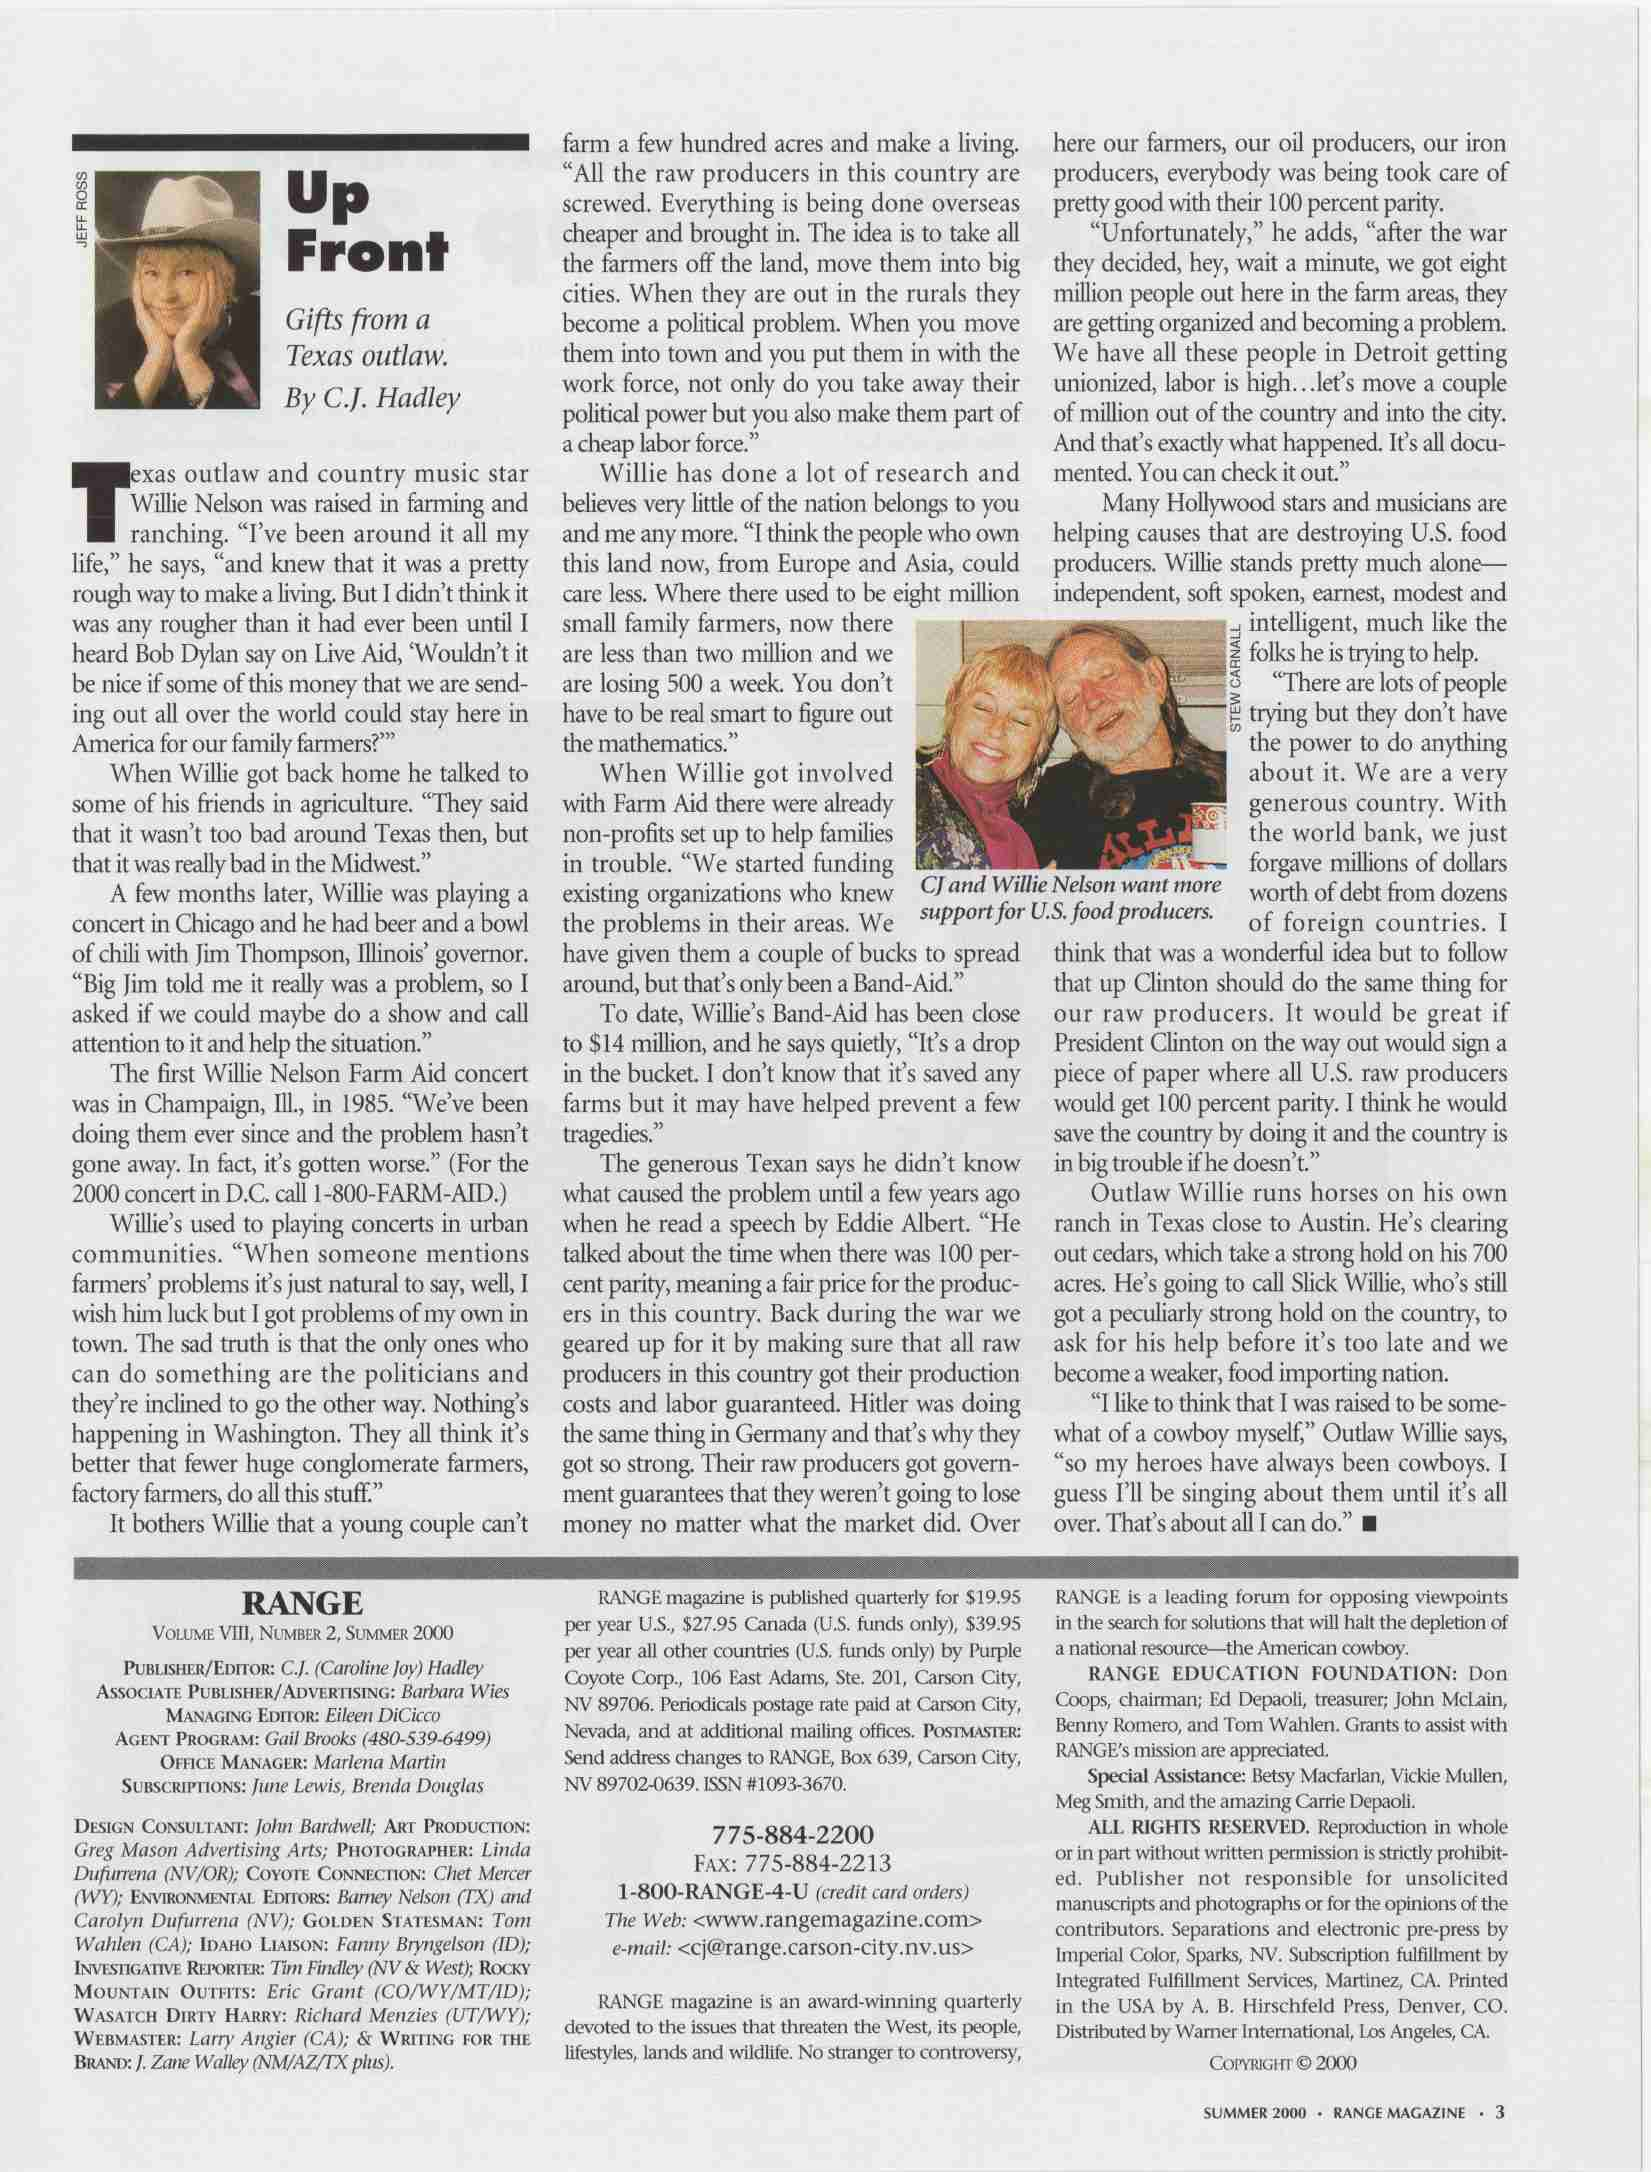

In [31]:
print('Data Exploration - Up Front (Editorial)')
Image('trainData/example/SU00-3.jpg',height=440, width=340)

Data Exploration - Spread


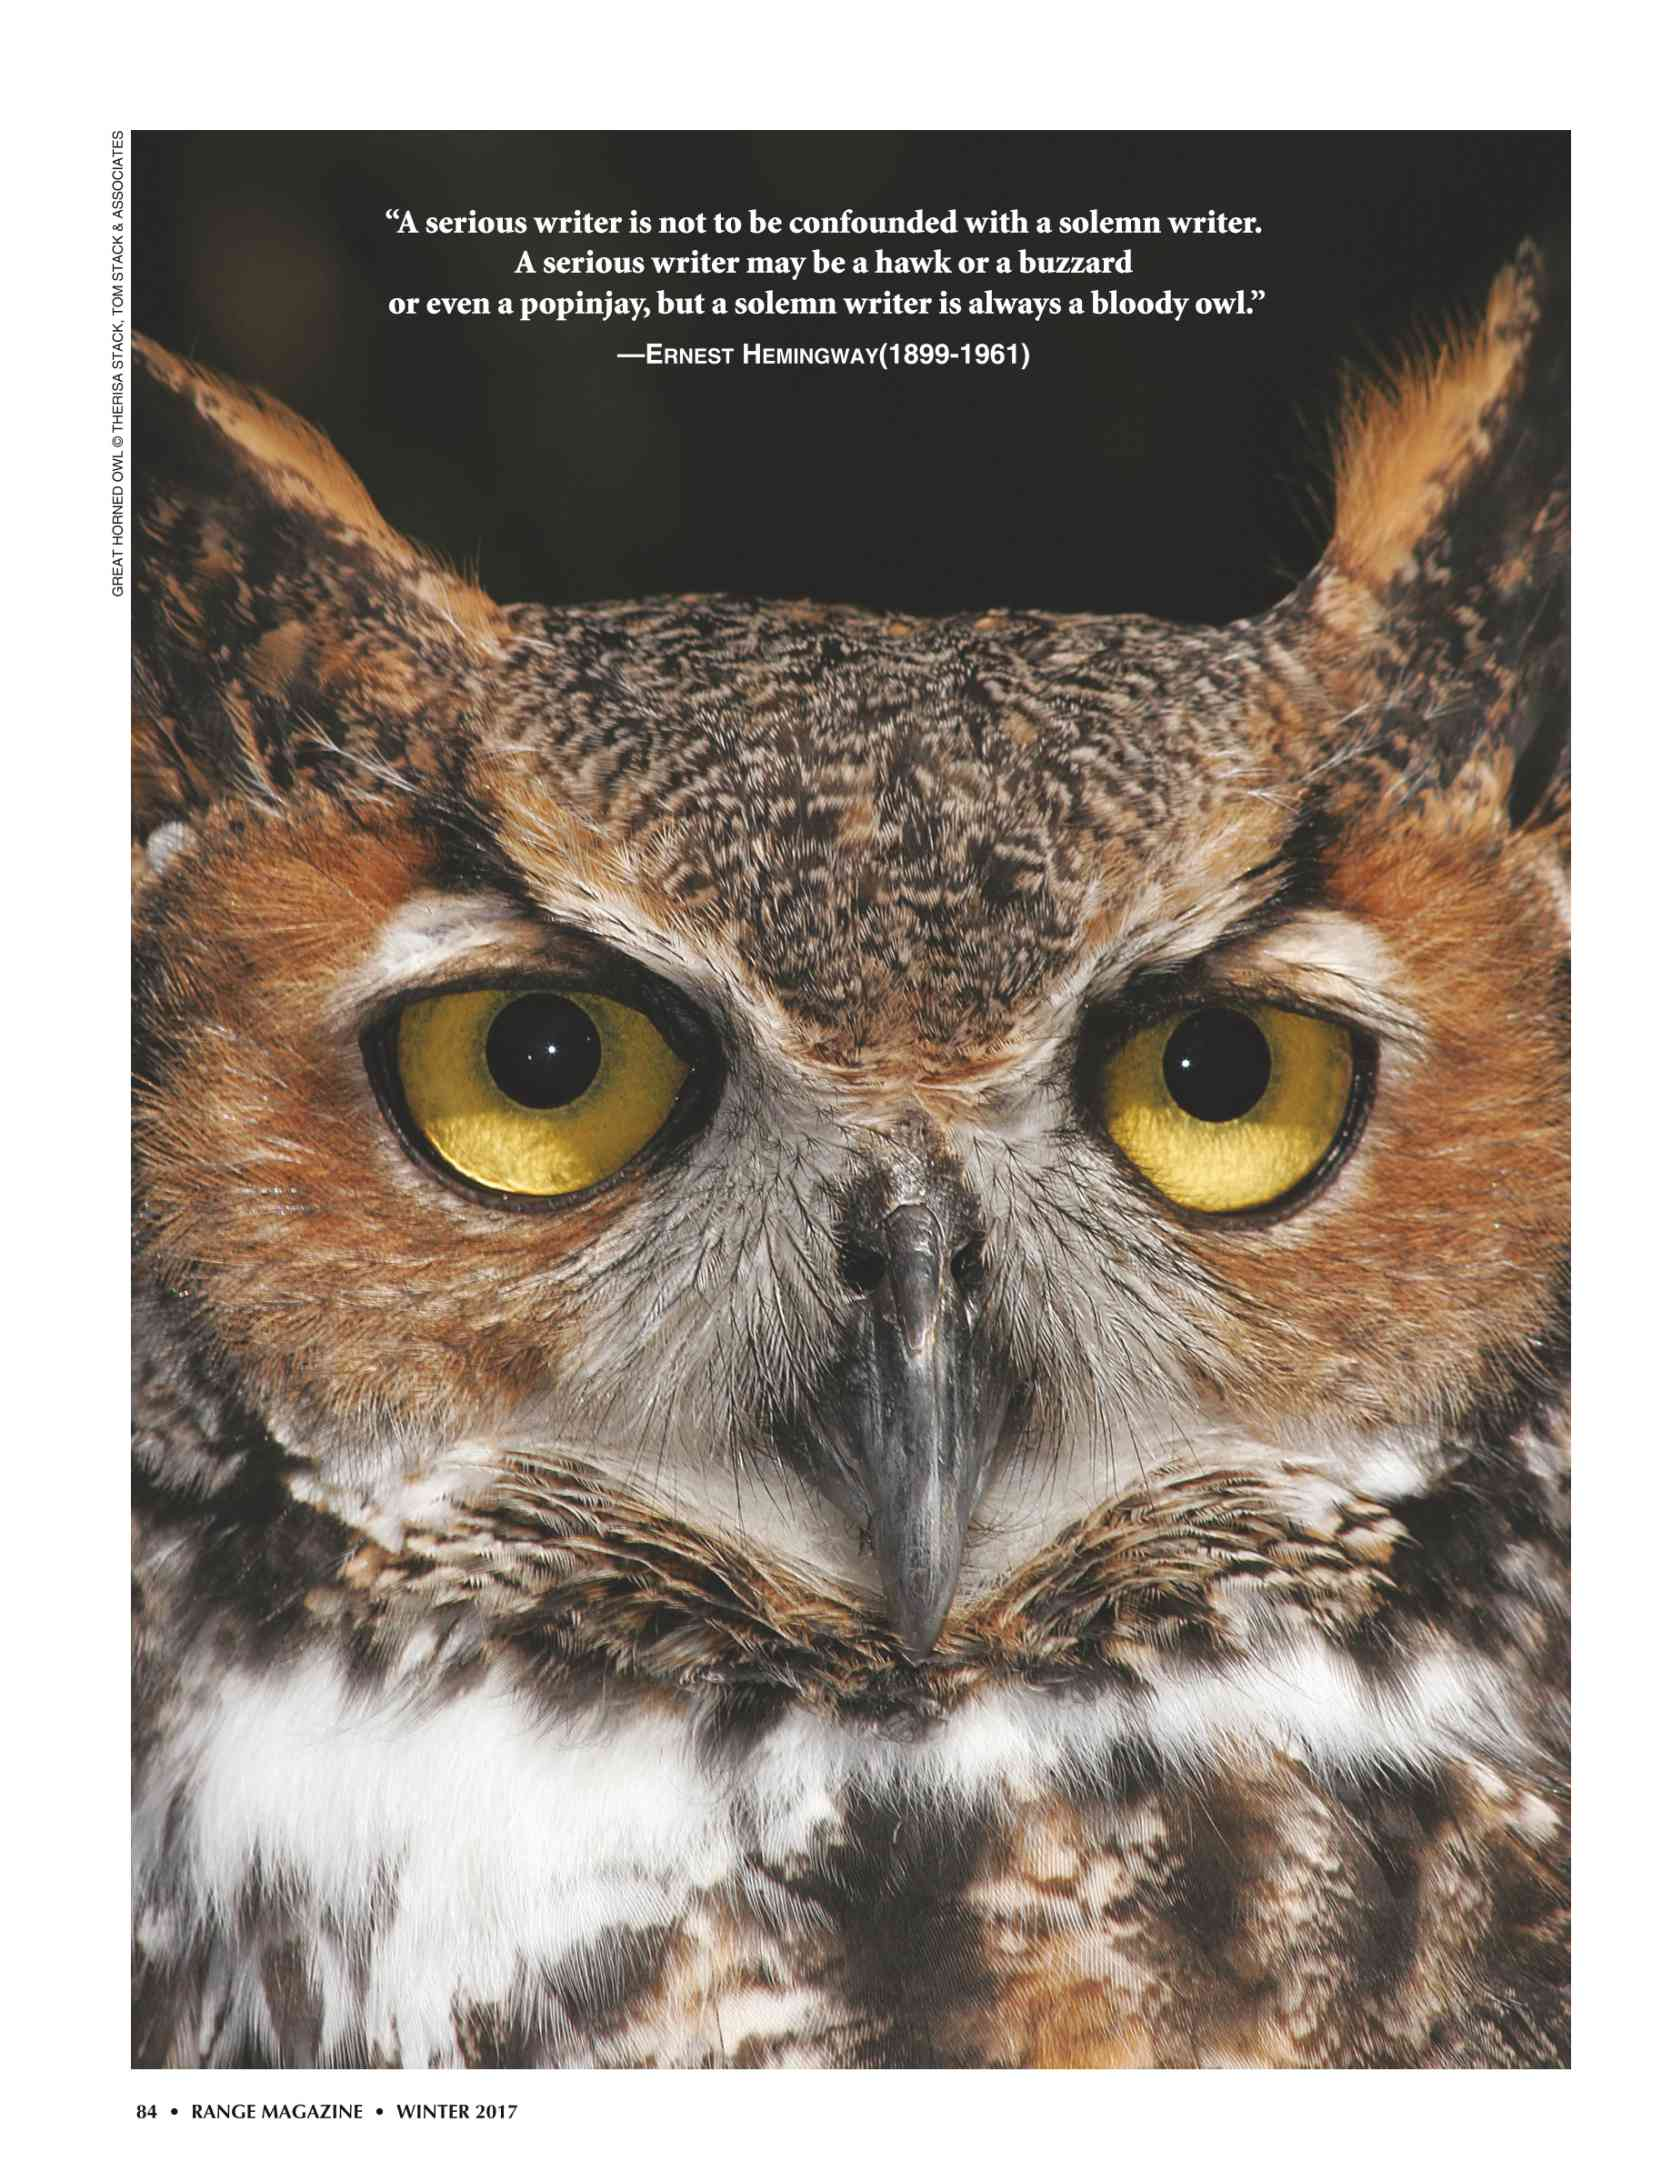

In [32]:
print('Data Exploration - Spread')
Image('trainData/example/WI17-84.jpg',height=440, width=340)

Data Exploration - Ad


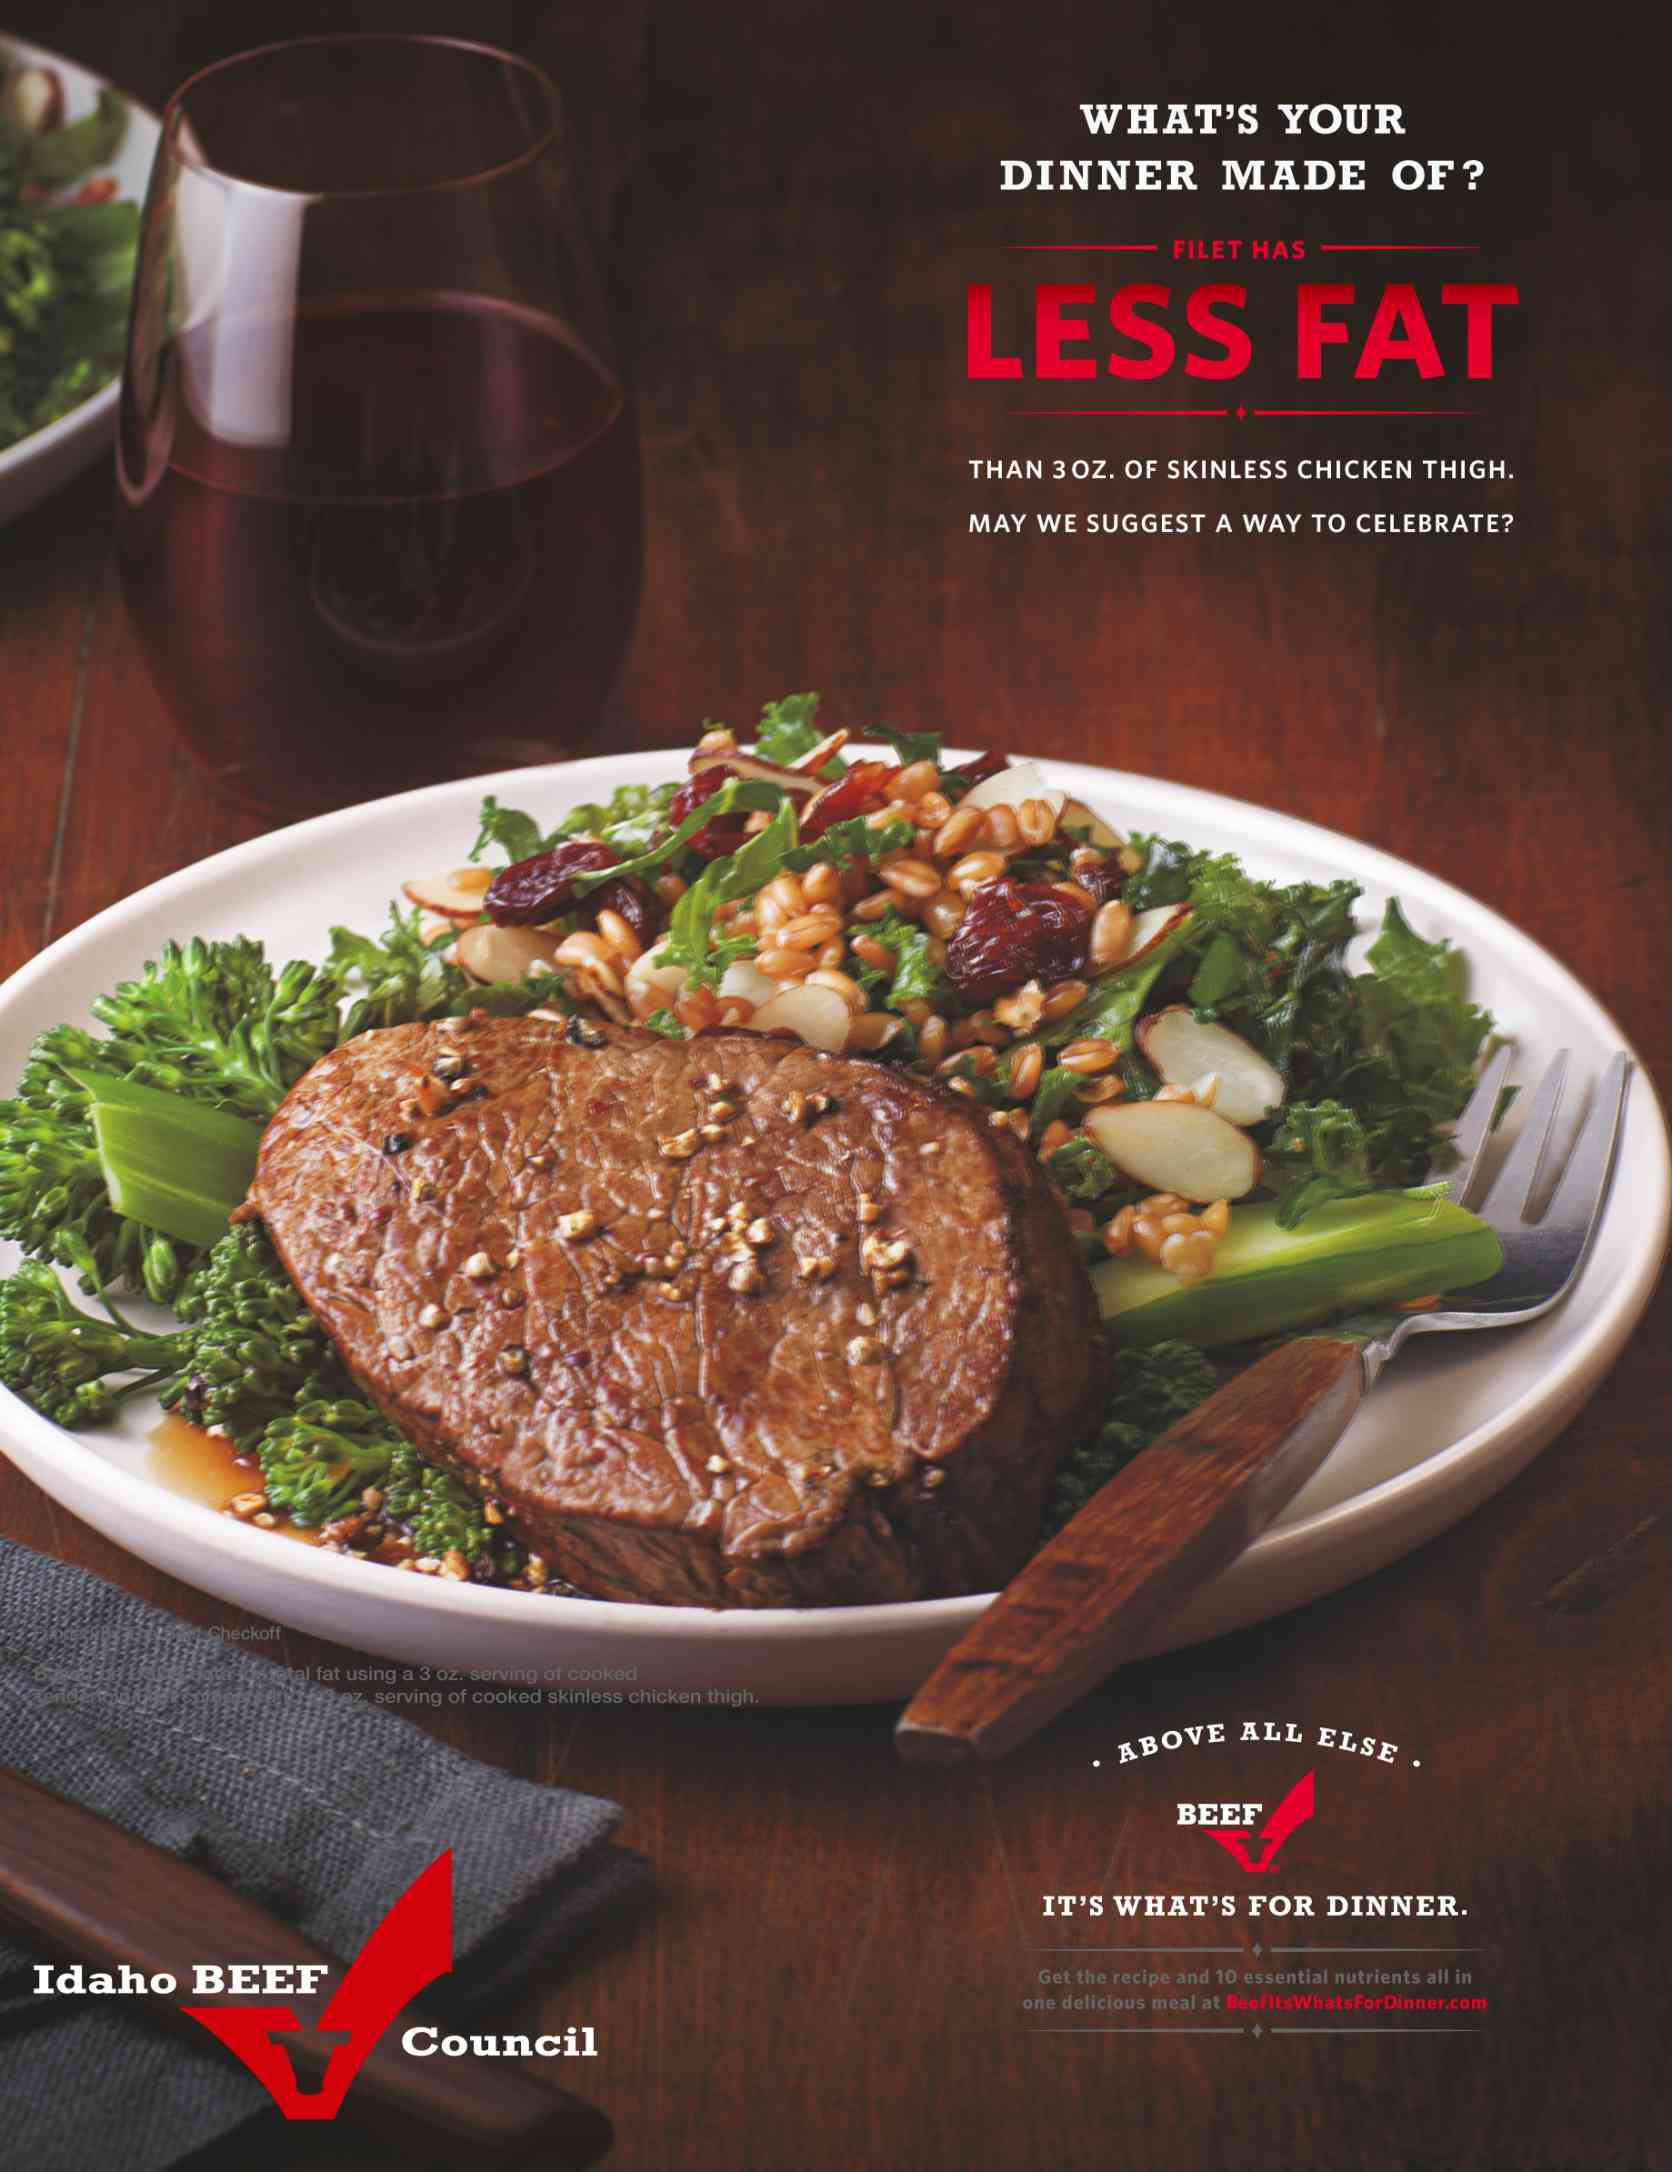

In [33]:
print('Data Exploration - Ad')
Image('trainData/example/SP14-2.jpg',height=440, width=340)

Data Exploration - Other


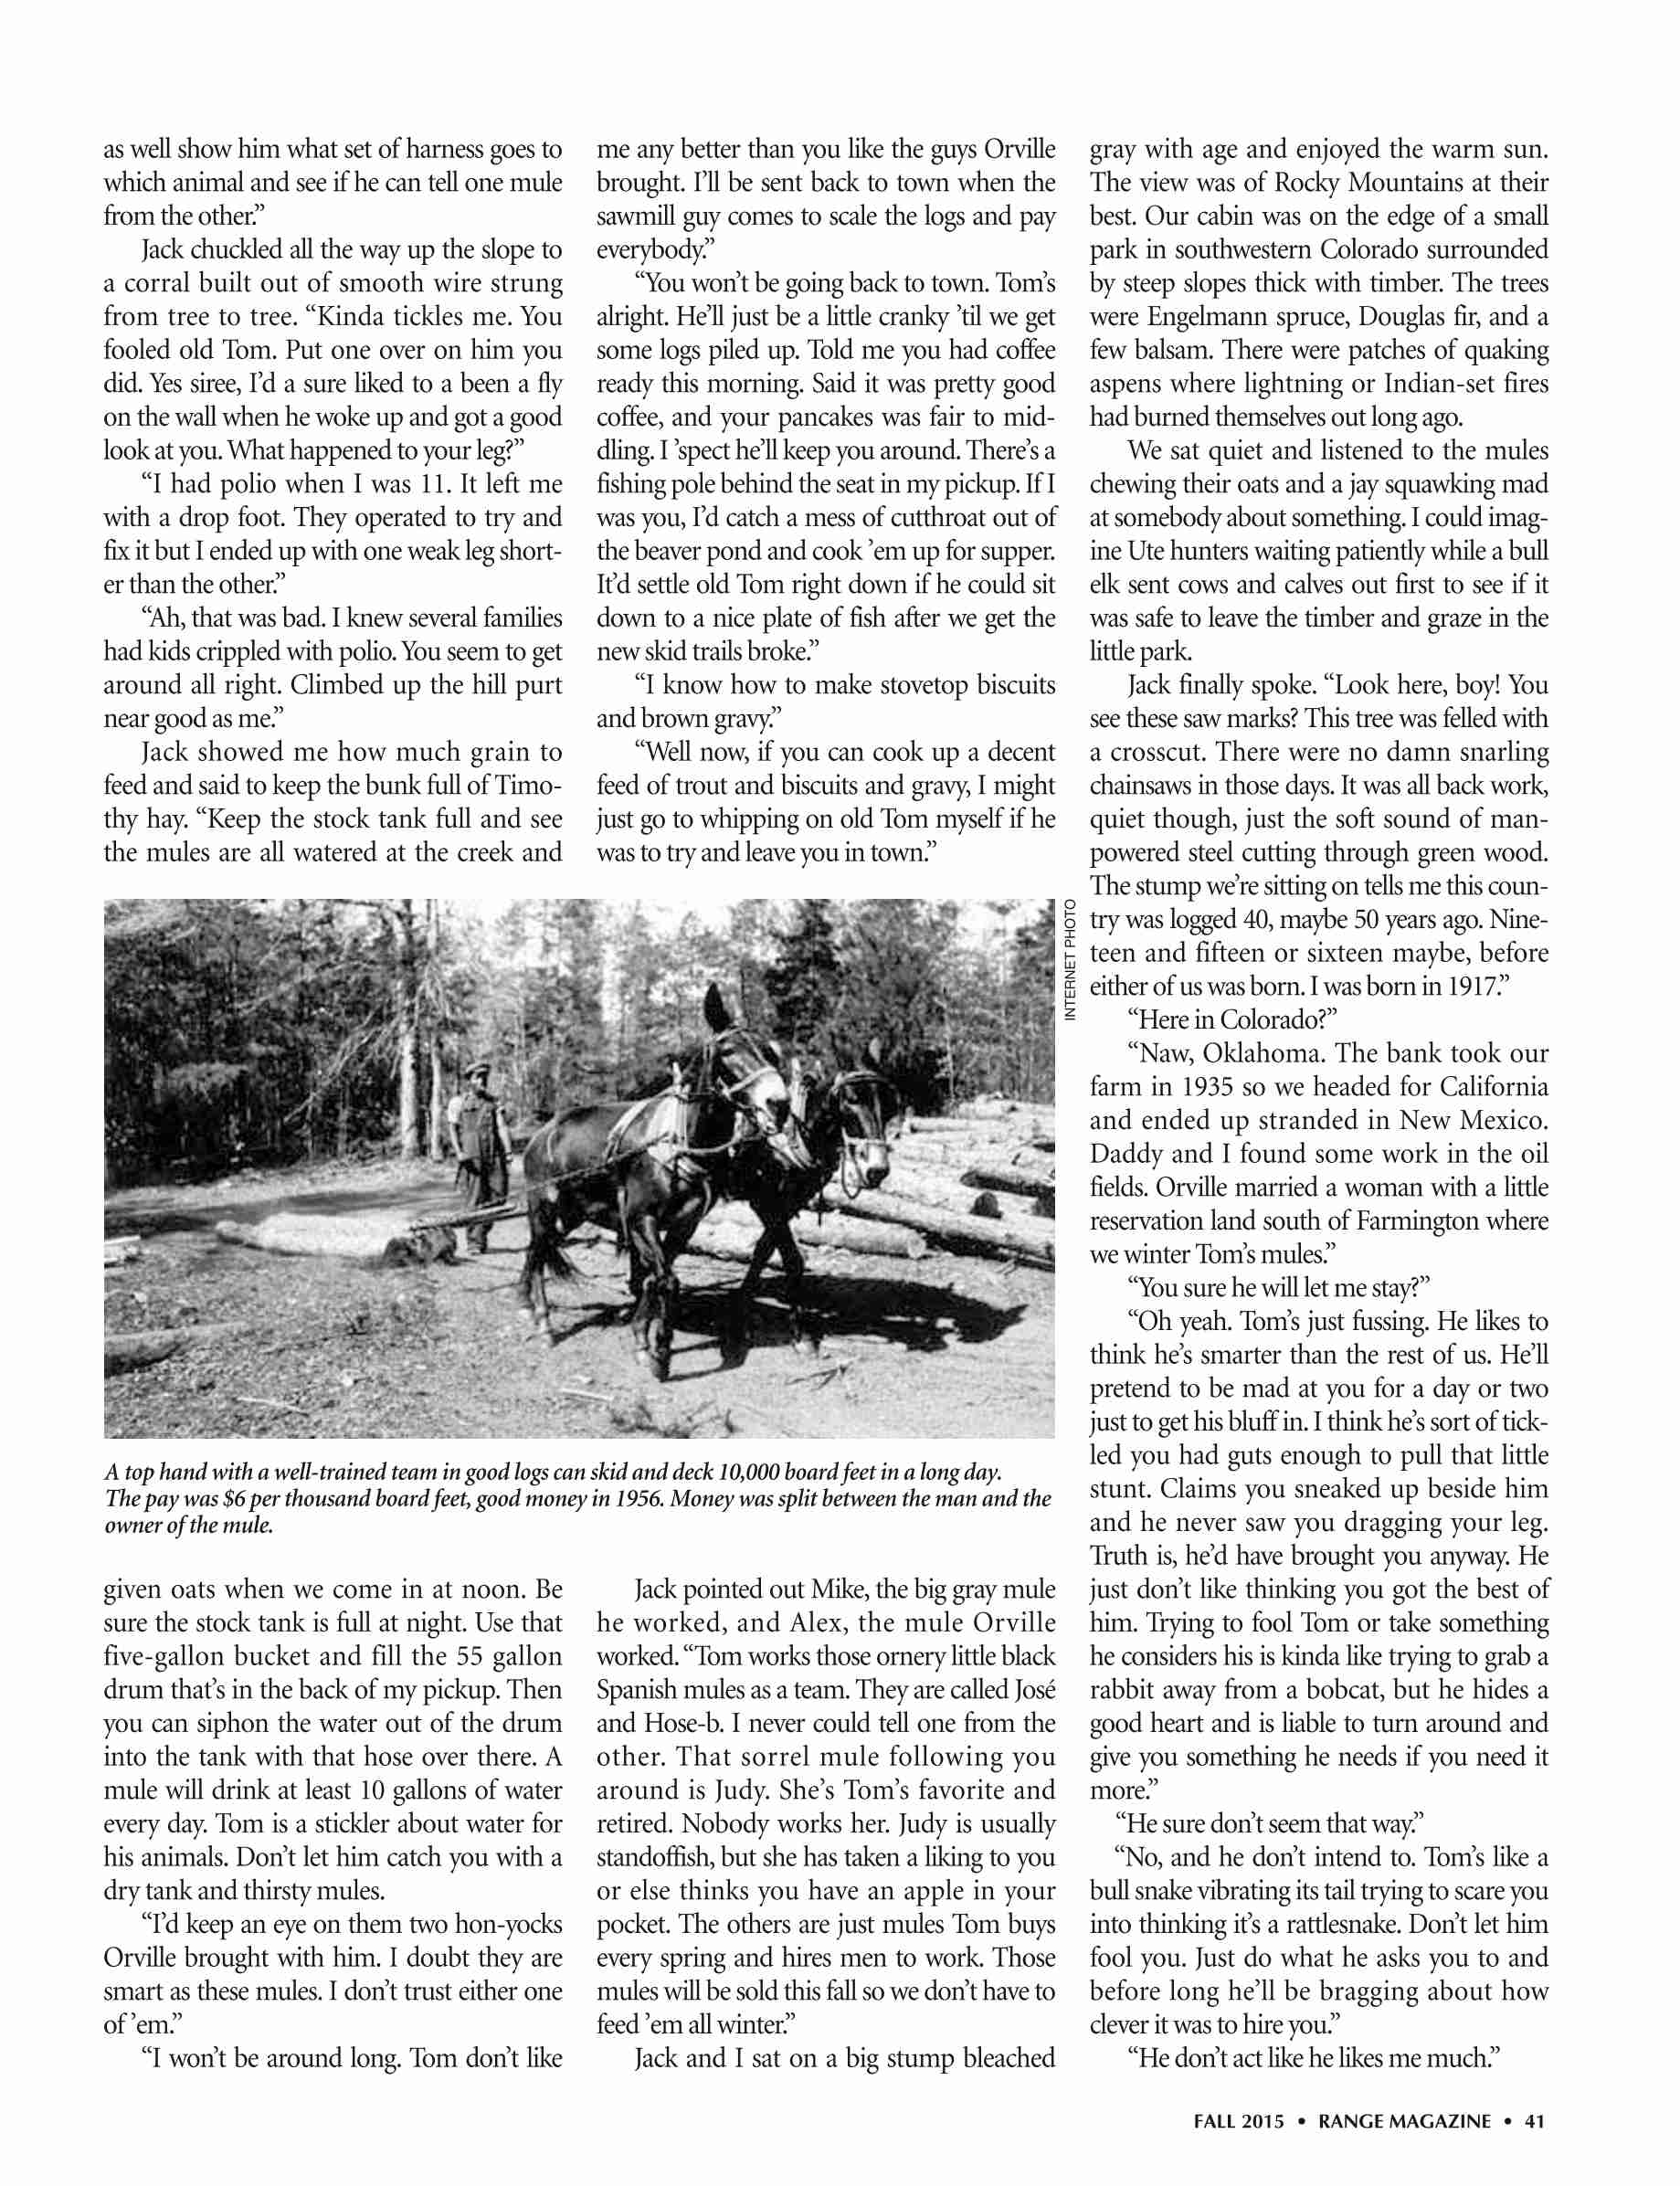

In [34]:
print('Data Exploration - Other')
Image('trainData/example/FA15-41.jpg',height=440, width=340)

## Hypothesis Test, Feature Engineering, and Model Selection

The categories were selected based on business rules and intuition. Ideally, every issue will have at least one of each category. 

Categories were also selected based on further processing plans. For example, category A may have a different post-identification processing pipeline than category B.

Given the complexity, business rules, and intent of the algorithm, a convolutional neural network is the framework of choice.

The use of a convolutional neural network is necessary as it is arguably the best way to process images. Advancements in the field are taking place at a rapid pace and we want to be a part of it. Familiarity with sophisticated bleeding edge technology is rewarding!

## Machine Learning Model Implementation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten
from tensorflow.python.keras.models import Sequential
import tensorflow as tf

#define preprocessing output size and model input size
sizeX=int(2200/4)
sizeY=int(700/4)
sizeZ=3

# Reads an image from file and decodes it
def decode_function(filename, label):
  image_string = tf.read_file(filename)
  image_decoded = tf.image.decode_jpeg(image_string)
  image = tf.image.resize_image_with_pad(image_decoded,sizeX,sizeY,sizeZ)
  return image, label 


#hold training data and labels
train_data=[]
train_lbls=[]

#import data and merge
import os
#define folder location
path = "C:/Users/tf/MagNeuralNet/train_data"
#move to folder
os.chdir(path)
#get current directory
wd=os.getcwd()
#save directory folder names
train_folders = os.listdir(wd)
#loop over folders
for folder in train_folders:
    #set label to folder name
    lbl=folder
    #get folder files
    newPath = ("C:/Users/tf/MagNeuralNet/train_data/" + folder)    
    os.chdir(newPath)
    newWd=os.getcwd()
    #save directory folder names
    currentFiles = os.listdir(newWd)
    #loop thru files in each folder
    for file in currentFiles:
        #append to train data
        fileName=(newPath + '/' + file)
        train_data.append(fileName)
        #append to train labels
        train_lbls.append(lbl)

#create tensorflow session
sess= tf.Session()
#set tensor pipeline
dataset=tf.data.Dataset.from_tensor_slices((train_data,train_lbls))
dataset=dataset.map(decode_function)
#generate iterator containing tensors
iterator = dataset.make_one_shot_iterator()
#hold training tensors
train_data_tensor=[]
#extract tensor items from iterator
for t in range(len(train_data)):
    next_element = iterator.get_next()
    tensor = sess.run(next_element)
    train_data_tensor.append(np.array(tensor))

train_data_list=[]
train_lbl_list=[]
#move tensor data and tensor labels into seperate arrays
for m in range(len(train_data_tensor)):
    train_data_list.append(train_data_tensor[m][0])
    train_lbl_list.append(train_data_tensor[m][1])

#confirm expectations
print(str(len(train_data_list)))
print(train_data_list[0].shape)
print(str(len(train_lbl_list)))

So far we have imported modules, defined a function for decoding our images to tensors (and keeping associated labels), defined the train data set, converted all elements from the training set to tensors, separated the tensor arrays of data and labels into seperate arrays, and displayed information about our training data and labels.

We must convert our labels which are currently type string, to an array of 1s and 0s. This is known as one hot encoding. The resulting array will be n_categories wide and n_observations in length.

In our case, we have 6 categories and 500 training labels. The resulting array has 6 columns and 500 rows.

In [ ]:
#one hot encode labels
count = len(train_folders)
categories=np.array(train_folders)
#initalize array
ohe_lbls = np.zeros((len(train_lbl_list), count))
#populate array
for ii in range(len(train_lbl_list)):
    jj=np.where(categories == train_lbls[ii])
    ohe_lbls[ii,jj] = 1      

#convert to np array
train_data_list=np.array(train_data_list)
train_lbl_list = np.array(train_lbl_list)  

Data has been one hot encoded and transformed to a numpy array.

We define, compile, and fit our neural network model below.

In [ ]:
#Assemble model
model=Sequential()
#first layer - padding argument to eliminate loss of edge pixels. Input none allows variable shape input
model.add(Conv2D(10, kernel_size=2, activation='relu', input_shape=(sizeX, sizeY, sizeZ), padding='same'))
#flatten model
model.add(Flatten())
#output layer
model.add(Dense(6, activation='softmax'))
#compile model
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
#fit model
training = model.fit(train_data_list, ohe_lbls, epochs=3, batch_size=1, validation_split=0.2)

Time to process the test data using steps similar to the train data.

In [ ]:
#import test data
test_data=[]
#define folder location
path = "C:/Users/tf/MagNeuralNet/test_data"
#move to folder
os.chdir(path)
#get current directory
wd=os.getcwd()
#save directory folder names
test_folders = os.listdir(wd)
#loop over folders
for folder in test_folders:
    #set label to folder name
    lbl=folder
    #get folder files
    newPath = ("C:/Users/tf/MagNeuralNet/test_data/" + folder)    
    os.chdir(newPath)
    newWd=os.getcwd()
    #save directory folder names
    currentFiles = os.listdir(newWd)
    #loop thru files in each folder
    for file in currentFiles:
        #append to train data
        fileName=(newPath + '/' + file)
        test_data.append(fileName)

#init session
testSess= tf.Session()
test_lbls=test_data
testDataset=tf.data.Dataset.from_tensor_slices((test_data,test_lbls))
testDataset=testDataset.map(decode_function)

testIterator = testDataset.make_one_shot_iterator()

test_data_tensor=[]
#run items from iterator
for t in range(len(test_data)):
    test_next_element = testIterator.get_next()
    testTensor = testSess.run(test_next_element)
    test_data_tensor.append(np.array(testTensor))

test_data_list=[]
#move data and labels into seperate arrays
for m in range(len(test_data_tensor)):
    test_data_list.append(test_data_tensor[m][0])

#convert to np array
test_data_list=np.array(test_data_list)

Finally, we make predictions using the test data set and print the resulting one hot encoded array.

In [ ]:
#make predictions
predict = model.predict(test_data_list)

#returns one hot encoded array of predictions
print(predict)

The prediction output array.


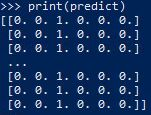

In [28]:
print('The prediction output array.')
Image('output/prediction.jpg')

# Reflection

The difficulty of deploying a convolutional neural network should be taken seriously. Challenges are present at every step - from data importing to graph generation.

The current model tends to fix on a value and predict most/all inputs to be that value. This can be attributed to any of a variety of variables (discussed below), but time contraints reduce the ability to debug and fine tune the model for more accurate predictions.

The result: a pittance of prediction ability - 16.67%...


We adjust the Conv2D layer for 2+ different models, with similar results.


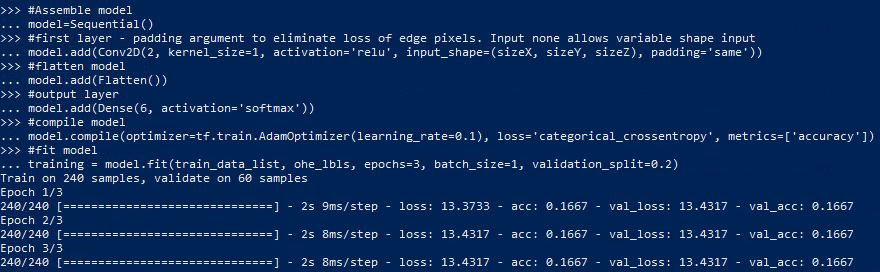

In [37]:
print('We adjust the Conv2D layer for 2+ different models, with similar results.')
Image('output/two.jpg')

Very little changes when we scale from 2 to 10 convolution filters. Training time does increase ~3-4 fold.

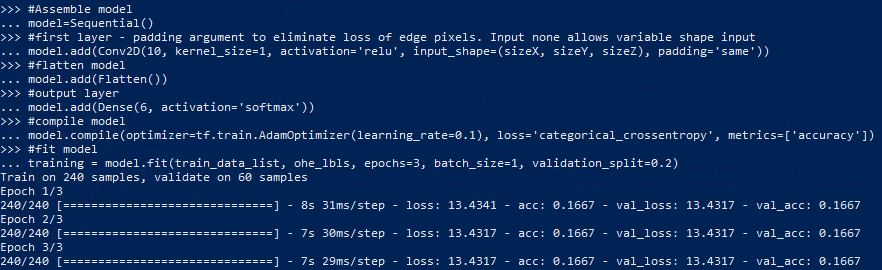

In [38]:
Image('output/ten.jpg')

# Suspected Reason(s) For Poor Prediction

- Downsized photos (limited resource requirement)
- Photos not transformed enough times in meaningful ways (alter hue, saturation, orientation, shuffle, etc.)
- Small Training Size (~50 of each type)
- Similarity of categories (all are pages from the same magazine)
- Model errors (learning rate, inputs, etc.)
- Potential data ingress mistake (syntax, processing steps)
- Others?

# Future Work

Future work with this model will be extensive. Tuning the model to achieve more accurate prediction ability is necessary. Moving to a Linux environment is desirable. Enabling GPU processing will allow faster processing of sophisticated models. Additional processing functions are intended to be included after the prediction pipeline to perform many tasks.

Pursuing this project has been worth the time and effort. By investing resources in further development of the script, ability to accurately predict could eventually near perfect automation. The knowledge gained from existing and future work will be prevalent in many other projects for years to come.

Thank you!

In [ ]:
#MagNeuralNet full script 12/10/2018 Andrew Galloway
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten
from tensorflow.python.keras.models import Sequential
import tensorflow as tf

#define preprocessing output size and model input size
sizeX=int(2200/4)
sizeY=int(700/4)
sizeZ=3

# Reads an image from file and decodes it
def decode_function(filename, label):
  image_string = tf.read_file(filename)
  image_decoded = tf.image.decode_jpeg(image_string)
  image = tf.image.resize_image_with_pad(image_decoded,sizeX,sizeY,sizeZ)
  return image, label 


#hold training data and labels
train_data=[]
train_lbls=[]

#import data and merge
import os
#define folder location
path = "C:/Users/tf/MagNeuralNet/train_data"
#move to folder
os.chdir(path)
#get current directory
wd=os.getcwd()
#save directory folder names
train_folders = os.listdir(wd)
#loop over folders
for folder in train_folders:
    #set label to folder name
    lbl=folder
    #get folder files
    newPath = ("C:/Users/tf/MagNeuralNet/train_data/" + folder)    
    os.chdir(newPath)
    newWd=os.getcwd()
    #save directory folder names
    currentFiles = os.listdir(newWd)
    #loop thru files in each folder
    for file in currentFiles:
        #append to train data
        fileName=(newPath + '/' + file)
        train_data.append(fileName)
        #append to train labels
        train_lbls.append(lbl);

#create tensorflow session
sess= tf.Session()
#set tensor pipeline
dataset=tf.data.Dataset.from_tensor_slices((train_data,train_lbls))
dataset=dataset.map(decode_function)
#generate iterator containing tensors
iterator = dataset.make_one_shot_iterator()
#hold training tensors
train_data_tensor=[]
#extract tensor items from iterator
for t in range(len(train_data)):
    next_element = iterator.get_next()
    tensor = sess.run(next_element)
    train_data_tensor.append(np.array(tensor))

train_data_list=[]
train_lbl_list=[]
#move tensor data and tensor labels into seperate arrays
for m in range(len(train_data_tensor)):
    train_data_list.append(train_data_tensor[m][0])
    train_lbl_list.append(train_data_tensor[m][1])

#confirm expectations
print(str(len(train_data_list)))
print(train_data_list[0].shape)
print(str(len(train_lbl_list)))

#one hot encode labels
count = len(train_folders)
categories=np.array(train_folders)
#initalize array
ohe_lbls = np.zeros((len(train_lbl_list), count))
#populate array
for ii in range(len(train_lbl_list)):
    jj=np.where(categories == train_lbls[ii])
    ohe_lbls[ii,jj] = 1      

#convert to np array
train_data_list=np.array(train_data_list)
train_lbl_list = np.array(train_lbl_list)  

#Assemble model
model=Sequential()
#first layer - padding argument to eliminate loss of edge pixels. Input none allows variable shape input
model.add(Conv2D(10, kernel_size=2, activation='relu', input_shape=(sizeX, sizeY, sizeZ), padding='same'))
#flatten model
model.add(Flatten())
#output layer
model.add(Dense(6, activation='softmax'))
#compile model
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
#fit model
training = model.fit(train_data_list, ohe_lbls, epochs=3, batch_size=1, validation_split=0.2)

#import test data
test_data=[]
#define folder location
path = "C:/Users/tf/MagNeuralNet/test_data"
#move to folder
os.chdir(path)
#get current directory
wd=os.getcwd()
#save directory folder names
test_folders = os.listdir(wd)
#loop over folders
for folder in test_folders:
    #set label to folder name
    lbl=folder
    #get folder files
    newPath = ("C:/Users/tf/MagNeuralNet/test_data/" + folder)    
    os.chdir(newPath)
    newWd=os.getcwd()
    #save directory folder names
    currentFiles = os.listdir(newWd)
    #loop thru files in each folder
    for file in currentFiles:
        #append to train data
        fileName=(newPath + '/' + file)
        test_data.append(fileName)

#init session
testSess= tf.Session()
test_lbls=test_data
testDataset=tf.data.Dataset.from_tensor_slices((test_data,test_lbls))
testDataset=testDataset.map(decode_function)

testIterator = testDataset.make_one_shot_iterator()

test_data_tensor=[]
#run items from iterator
for t in range(len(test_data)):
    test_next_element = testIterator.get_next()
    testTensor = testSess.run(test_next_element)
    test_data_tensor.append(np.array(testTensor))

test_data_list=[]
#move data and labels into seperate arrays
for m in range(len(test_data_tensor)):
    test_data_list.append(test_data_tensor[m][0])


test_data_list=np.array(test_data_list)
#make predictions
predict = model.predict(test_data_list)

#returns hot encoded array of predictions
print(predict)